<h2>Introduction</h2>
<p>
In this notebook we are going to apply an EDA the English Premier League player data set ranging from the 2015-16 to 2018-19 seasons. The dataset includes player positional data such as player age, fouls commited per season, season year scope, nation of the player, market value at beginning of season, and position of player.
</p>
<br>
<hr>
<br>
<h3> About the dataset </h3>

<p>
Data is pulled from premierleague.com and graciously compiled into csvs <a href="https://www.kaggle.com/datasets/dortmund4436/premier-league-player-stats-from-2015-to-2018" alt="link to kaggle data"> here </a>.
</p>


<br>
<hr>
<br>
<h4> Data Definitition </h4>

<p>

<strong> Player: </strong> Name of the player. <br>

<strong> Season: </strong> The season expressed in the starting and ending year where the features are scoped. <br>

<strong> Born: </strong> The year of the players birth. <br>

<strong> Nation: </strong> The country the player represents. <br>

<strong> Age: </strong> Number of years the player was during the season. <br>

<strong> Squad: </strong> The club where the player was registered for the given season. <br>

<strong> Previous Market Value: </strong> Market value of the player before the season started <br>

<strong> Position: </strong> General position player plays in. <br>

<strong> App: </strong> The number of appearances a player made for the specific season. <br>

<strong>Minutes</strong>: The total number of minutes played by a player during a match.<br>

<strong>Goals</strong>: The number of goals scored by a player during a match.<br>

<strong>Passes</strong>: The total number of successful passes made by a player during a match.<br>

<strong>Assists</strong>: The number of times a player has provided a pass or set up a goal-scoring opportunity for a teammate.<br>

<strong>Yellow</strong>: The number of yellow cards received by a player during a match, indicating a caution from the referee.<br>

<strong>Red</strong>: The number of red cards received by a player during a match, resulting in a dismissal from the game.<br>

<strong>SubOn</strong>: The number of times a player has been substituted onto the field during a match.<br>

<strong>SubOff</strong>: The number of times a player has been substituted off the field during a match.<br>

<strong>Shots</strong>: The total number of shots taken by a player during a match.<br>

<strong>SOT</strong>: The number of shots on target (SOT) taken by a player during a match, indicating shots that were aimed towards the goal.<br>

<strong>HitPost</strong>: The number of times a player's shot has hit the goalpost during a match.<br>

<strong>HeadClear</strong>: The number of times a player has successfully cleared the ball with their head during a match.<br>

<strong>HeadGoal</strong>: The number of goals scored by a player using their head during a match.<br>

<strong>PKScored</strong>: The number of penalty kicks successfully converted into goals by a player during a match.<br>

<strong>FKGoal</strong>: The number of goals scored by a player from a free-kick during a match.<br>

<strong>Offsides</strong>: The number of times a player has been caught in an offside position during a match.<br>

<strong>ThrBall</strong>: The number of through balls played by a player during a match, indicating a pass that splits the opposing defense and reaches a teammate.<br>

<strong>Misses</strong>: The number of shots or passes attempted by a player that did not reach the intended target.<br>

<strong>Corners</strong>: The number of corner kicks taken by a player during a match.<br>

<strong>Crosses</strong>: The number of crosses delivered by a player from wide areas into the opposition's penalty area during a match.<br>

<strong>Blocks</strong>: The number of times a player has blocked an opponent's shot or pass during a match.<br>

<strong>Interceptions</strong>: The number of times a player has intercepted the ball from an opponent during a match.<br>

<strong>Fouls</strong>: The number of fouls committed by a player during a match.<br>

<strong>Last man</strong>: A situation where a player is the last defender and risks conceding a goal if they fail to successfully defend against an attacking opponent.<br>

<strong>Tackles</strong>: The number of successful tackles made by a player during a match, indicating a defensive action to dispossess an opponent.<br>

<strong>ELG</strong>: Acronym for Expected Goals, a statistical measure estimating the probability of a shot resulting in a goal.<br>

<strong>OwnGoal</strong>: The number of own goals scored by a player during a match, where they inadvertently score a goal for the opposing team.<br>

<strong>Clears</strong>: The number of times a player has successfully cleared the ball from their team's defensive area during a match.<br>

<strong>ABW</strong>: Acronym for Aerial Battles Won, representing the number of aerial duels won by a player during a match, indicating successful challenges for the ball in the air.<br>

<strong>ABL</strong>: Acronym for Aerial Battles Lost, representing the number of aerial duels lost by a player during a match, indicating unsuccessful challenges for the ball in the air.<br>

</p>

<br>

<hr>


<h3> Setup of Data </h3>

<p> First steps, I will import all the required python libraries and configure the base directories so that loading each season's dataframe requires less change when moving the data between systems. Each season will have separate analytics completed before merging all seasons together for a roll up view.
</p>

In [35]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sbn

basedir = os.path.dirname(os.path.abspath(__name__))

# Setting up Dataframe
player_df = pd.read_csv(os.path.join(basedir,'premierleague.csv'))

# Enable view of all features at once
pd.set_option('display.max_columns', None)


In [36]:
player_df.columns.size

40

<h4> Reviewing the Features </h4>

<p>

As we can see below we have a total of 40 features in the given data set. As the scope of this EDA reflects the impact of age on defensive abilities, we will be removing the features related to goal scoring and attacking presence along with market values. There is a space for "HitPost" so I've added to the features here. If desired it can be updated on the csv. 

</p>

In [37]:
unnecessary_features = ['Previous Market Value', 'Market Value', 'Goals', 'Passes', 'Assists', 'Shots', 'SOT', 'HitPost ', 'HeadGoal', 'PKScored', 'FKGoal', 'Offsides', 'ThrBall', 'Misses', 'Corners', 'Crosses', 'ELG']

player_df.drop(unnecessary_features, axis=1, inplace=True)

player_df.head()

,Player,Season,Born,Age,Squad,Nation,Position,App,Minutes,Yellow,Red,SubOn,SubOff,HeadClear,Blocks,Interceptions,Fouls,Last man,Tackles,OwnGoal,Clears,ABW,ABL
0,Éder,2015-2016,1987,27,Swansea City,Portugal,FW,13,269,0,0,11,2,5,0,0,11,0,4,0,7,9,20
1,Álvaro Morata,2017-2018,1992,25,Chelsea,Spain,FW,31,2067,7,0,7,12,13,4,6,41,0,13,0,20,54,59
2,Álvaro Morata,2018-2019,1992,25,Chelsea,Spain,FW,16,943,0,0,5,7,4,1,0,19,0,8,0,6,18,28
3,Álvaro Negredo,2016-2017,1985,30,Middlesbrough,Spain,FW,36,2877,5,0,3,13,46,3,10,45,0,18,0,65,175,177
4,Aaron Cresswell,2018-2019,1989,28,West Ham United,England,DF,20,1590,1,0,2,2,23,7,23,2,1,29,0,42,25,18


<h4> Summary of Player Data </h4>

<p>
I've broken out the total number of players based on the positions we are going to review. Although this is a focus on defensive ability, it is very common for forward position to press on dispossession. We will need to find out how skewed the data is in any given part of the pitch. As we can see in the countplot, Midfielders take up the largest portion while defenders are not far behind. Forwards will account for the least amount of players. This spread matches the expected spread based on total number of positions on a football team. 

</p>

<Axes: xlabel='Position', ylabel='count'>

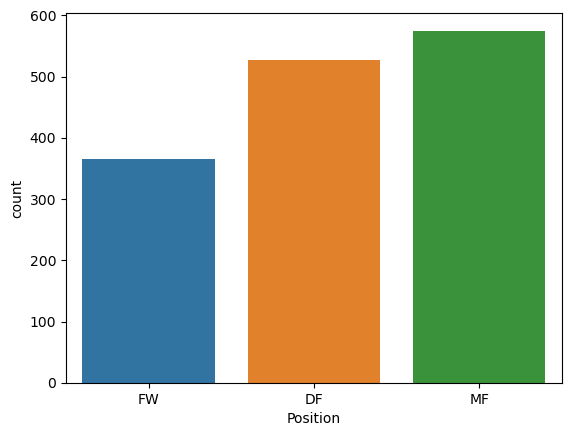

In [39]:
sbn.countplot(player_df,x="Position")

<h4> Numerical Feature Distribution </h4>

<p>

To understand the numerical features in our given dataset we will be creating a separate dataframe with all of the remaining numerical values and evaluating the distribution finding the mean, median, and mode. Analyzing each feature will allow discovery of any outliers, varience in min/max and if they are reasonable, and any errors during data recording. 

In [45]:
numerical = [var for var in player_df.columns if player_df[var].dtype!= 'O']

num_df = player_df[numerical]

print("Number of numerical features: {}".format(len(numerical)))

Number of numerical features: 18


<h4> Outliers for Age Groups </h4>

<p>

Breaking down the total number of games a specific age group helps recognize any massive outliers between the age groups. Our total age min maxes also have the smallest group of appearances. The total number of games played by age is well distributed between most of the intervals.

In [87]:
mean_age = round(num_df["Age"].mean())
mode_age = num_df["Age"].mode()
min_age = num_df["Age"].min()
max_age = num_df["Age"].max()

      
age_dict = {}

for x in num_df["Age"].unique():
    new_age_dict = {}
    new_age_dict["min"] = num_df[num_df["Age"]== x]["App"].min()
    new_age_dict["max"] = num_df[num_df["Age"]== x]["App"].max()
    new_age_dict["median"] = num_df[num_df["Age"]== x]["App"].median()
    age_dict[x] = new_age_dict

age_dict


{27: {'min': 10, 'max': 38, 'median': 28.0},
 25: {'min': 10, 'max': 38, 'median': 27.5},
 30: {'min': 10, 'max': 38, 'median': 27.0},
 28: {'min': 10, 'max': 38, 'median': 26.0},
 26: {'min': 10, 'max': 38, 'median': 28.0},
 29: {'min': 10, 'max': 38, 'median': 26.0},
 31: {'min': 10, 'max': 38, 'median': 26.0},
 24: {'min': 10, 'max': 38, 'median': 27.0},
 21: {'min': 10, 'max': 38, 'median': 24.0},
 23: {'min': 10, 'max': 38, 'median': 27.0},
 22: {'min': 10, 'max': 38, 'median': 23.0},
 19: {'min': 10, 'max': 34, 'median': 16.0},
 20: {'min': 10, 'max': 38, 'median': 23.0},
 33: {'min': 14, 'max': 37, 'median': 26.0},
 34: {'min': 10, 'max': 38, 'median': 22.0},
 32: {'min': 11, 'max': 38, 'median': 25.0},
 37: {'min': 12, 'max': 25, 'median': 18.5},
 38: {'min': 14, 'max': 14, 'median': 14.0},
 18: {'min': 10, 'max': 35, 'median': 25.0},
 35: {'min': 23, 'max': 34, 'median': 28.0},
 36: {'min': 25, 'max': 36, 'median': 31.0},
 17: {'min': 11, 'max': 11, 'median': 11.0}}

<Axes: xlabel='Age', ylabel='App'>

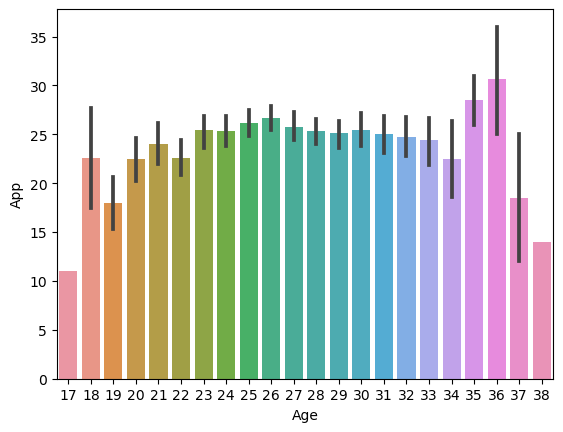

In [88]:
sbn.barplot(num_df,x="Age",y="App")


In [ ]:
sbn.heatmap(num_df.corr(),vmin=-1, vmax=1,square=True,)